In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from nilearn.image import new_img_like
from nilearn.plotting import plot_surf_roi, plot_roi
from nilearn.datasets import fetch_surf_fsaverage
from nilearn.surface import vol_to_surf

subjects1 = ['100206', '100307', '100408', '100610']
subjects2 = ['152427', '152831', '153025', '153126']

# from funROI.datasets import hcp
# hcp.fetch_data("./data", task='LANGUAGE', subjects=subjects1+subjects2)

In [17]:
fsaverage = fetch_surf_fsaverage('fsaverage5')

def plot_surf(data, views=["lateral", "medial"], hemispheres=["left", "right"],
              inflate=False,prev_marker=None,new_marker=None):
#    print(fsaverage)
   surf_data = {
       "left": vol_to_surf(data, fsaverage.pial_left,
                           interpolation='nearest', radius=0),
       "right": vol_to_surf(data, fsaverage.pial_right,
                            interpolation='nearest', radius=0),
   }
   for hemi in hemispheres:
       for view in views:
            surf_mesh = f"infl_{hemi}" if inflate else f"pial_{hemi}"
            plot_surf_roi(
                surf_mesh=getattr(fsaverage, surf_mesh),
                roi_map=surf_data[hemi],
                hemi=hemi,
                view=view,
                # engine="plotly",
                bg_on_data=True,
                bg_map=getattr(fsaverage, f"sulc_{hemi}"),
                darkness=0.5,
                cmap="gist_ncar",
                avg_method='max',
                prev_marker=prev_marker,
                new_marker=new_marker
            )
            

In [4]:
import funROI
funROI.set_bids_data_folder('./data/bids')
funROI.set_bids_preprocessed_folder('./data/bids')
funROI.set_bids_deriv_folder('./data/bids/derivatives')
funROI.set_analysis_output_folder("./data/analysis")

from funROI.first_level.nilearn import run_first_level
run_first_level(
    task = 'LANGUAGE',
    subjects = subjects1 + subjects2,
    space = 'MNINonLinear',
    contrasts = [
        ('story', {'story': 1}),
        ('math', {'math': 1}),
        ('story-math', {'story': 1, 'math': -1}),
    ],
    hrf_model='spm + derivative',
    smoothing_fwhm=4,
    noise_model="ar1",
    slice_time_ref = 0
)

/Users/songwen/Documents/Code Lab/funROI/funROI/first_level/nilearn.py:94: UserWarning: 'StartTime' not found in file /Users/songwen/Documents/Code Lab/funROI/data/bids/sub-100206/func/sub-100206_task-LANGUAGE_run-1_acq-LR_space-MNINonLinear_bold.json.
  first_level_from_bids(


In [5]:
from funROI.analysis import ParcelsGenerator
parcels_generator = ParcelsGenerator(
    parcels_name="Language",
    smoothing_kernel_size=10,
    overlap_thr_vox=0.20
)
parcels_generator.add_subjects(
    subjects=subjects1,
    task="LANGUAGE",
    contrasts=["story-math"],
    p_threshold_type="none",
    p_threshold_value=0.05,
)
parcels = parcels_generator.run()

/Users/songwen/Documents/Code Lab/funROI/funROI/analysis/parcels_gen.py:470: RuntimeWarning: divide by zero encountered in divide
  return len(data) / np.sum(1 / data)


/var/folders/6k/pb317l7j3cvbw86w9005j5340000gp/T/ipykernel_35169/3897153097.py:7: FutureWarning: The 'nearest' interpolation method will be deprecated in 0.13.0. To disable this warning, select either 'linear' or 'nearest_most_frequent'. If your image is a deterministic atlas 'nearest_most_frequent' is recommended. Otherwise, use 'linear'. See the documentation for more information.
  "left": vol_to_surf(data, fsaverage.pial_left,
/var/folders/6k/pb317l7j3cvbw86w9005j5340000gp/T/ipykernel_35169/3897153097.py:9: FutureWarning: The 'nearest' interpolation method will be deprecated in 0.13.0. To disable this warning, select either 'linear' or 'nearest_most_frequent'. If your image is a deterministic atlas 'nearest_most_frequent' is recommended. Otherwise, use 'linear'. See the documentation for more information.
  "right": vol_to_surf(data, fsaverage.pial_right,


marker names:  ['#74e800', '#00edff', 'language', '#009bff', '#dbff20', '#ff3400', '#ff0047', '#00570f', '#40e100', '#f6c1f7', '#ff9109']
marker names:  ['#74e800', '#00edff', 'language', '#009bff', '#dbff20', '#ff3400', '#ff0047', '#00570f', '#40e100', '#f6c1f7', '#ff9109']
marker names:  ['#dd11ff', '#ffdf00', '#f6fc08', '#26f000', '#ffc10b', '#84ff0c', '#00fc5e', '#b044fa', '#00e0ff', '#ff2600', '#f6c1f7']
marker names:  ['#dd11ff', '#ffdf00', '#f6fc08', '#26f000', '#ffc10b', '#84ff0c', '#00fc5e', '#b044fa', '#00e0ff', '#ff2600', '#f6c1f7']


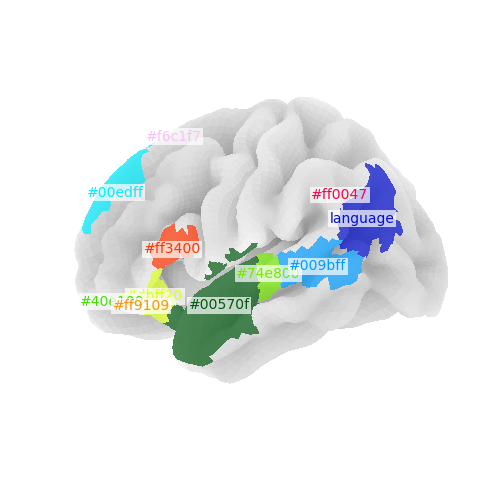

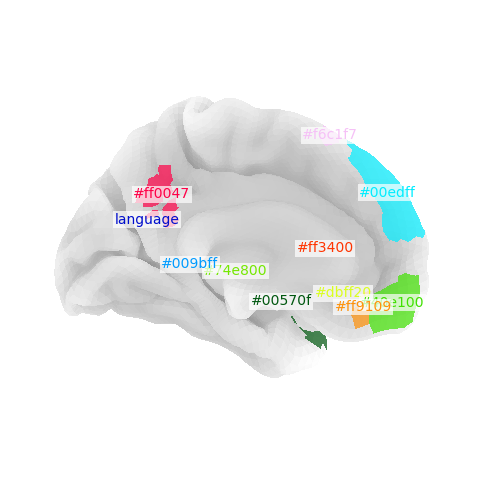

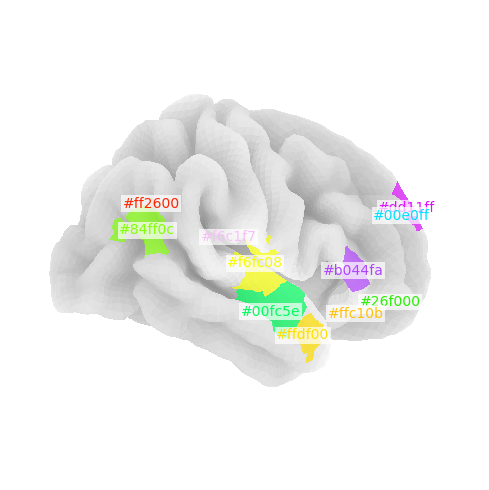

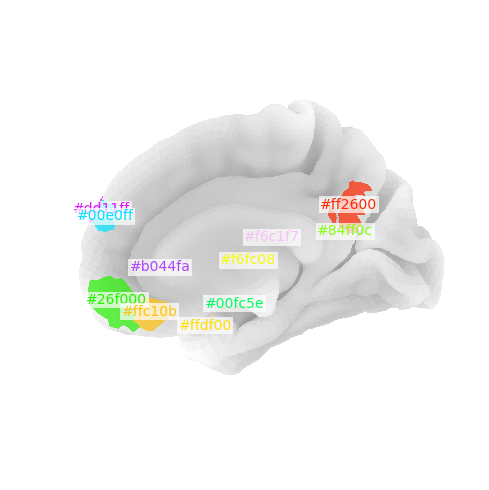

In [23]:
plot_surf(parcels, views=["lateral", "medial"], hemispheres=["left", "right"],prev_marker="#000ecd",new_marker="language")
